In [1]:
import requests
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
endpoint = 'https://api.vndb.org/kana/vn'

# filters = ["and", 
#             ["olang", "=", "ja"],
#             ["popularity", ">=", "90"]]

filters = ["olang", "=", "ja"]

fields = "id, title, released, length_minutes, rating, popularity, tags.id"

query = {
  "filters": filters,
  "fields": fields,
  "sort": "popularity",
  "reverse": True,
  "results": 100,
  "page": 1,
  # "user": False,
  "count": False,
  "compact_filters": False,
  "normalized_filters": False
}

In [3]:
response = requests.post(endpoint, json=query)
response

<Response [200]>

In [4]:
data = json.loads(response.text)["results"]
data

[{'tags': [{'id': 'g4'},
   {'id': 'g9'},
   {'id': 'g6'},
   {'id': 'g19'},
   {'id': 'g2'},
   {'id': 'g32'},
   {'id': 'g23'},
   {'id': 'g250'},
   {'id': 'g58'},
   {'id': 'g138'},
   {'id': 'g56'},
   {'id': 'g159'},
   {'id': 'g70'},
   {'id': 'g43'},
   {'id': 'g599'},
   {'id': 'g1275'},
   {'id': 'g1053'},
   {'id': 'g407'},
   {'id': 'g1646'},
   {'id': 'g627'},
   {'id': 'g476'},
   {'id': 'g1182'},
   {'id': 'g3161'},
   {'id': 'g862'},
   {'id': 'g728'},
   {'id': 'g878'},
   {'id': 'g567'},
   {'id': 'g1582'},
   {'id': 'g653'},
   {'id': 'g3520'},
   {'id': 'g66'},
   {'id': 'g309'},
   {'id': 'g164'},
   {'id': 'g80'},
   {'id': 'g180'},
   {'id': 'g148'},
   {'id': 'g118'},
   {'id': 'g1154'},
   {'id': 'g874'},
   {'id': 'g976'},
   {'id': 'g794'},
   {'id': 'g2086'},
   {'id': 'g3324'},
   {'id': 'g373'},
   {'id': 'g661'},
   {'id': 'g1204'},
   {'id': 'g820'},
   {'id': 'g1478'},
   {'id': 'g2619'},
   {'id': 'g546'},
   {'id': 'g1234'},
   {'id': 'g72'},
   {'id'

In [5]:
df = pd.DataFrame(data)
df['released'] = pd.to_datetime(df['released'])
df['released_unix'] = (df['released'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df['tags'] = df['tags'].apply(lambda tag_list: [tag['id'] for tag in tag_list])
df['number_tags'] = df['tags'].apply(len)
df

,tags,length_minutes,title,popularity,id,rating,released,released_unix,number_tags
0,"[g4, g9, g6, g19, g2, g32, g23, g250, g58, g13...",5160,Fate/stay night,100.00,v11,86.1,2004-01-30,1075420800,181
1,"[g23, g8, g19, g117, g156, g633, g420, g1897, ...",375,Saya no Uta,91.10,v97,80.1,2003-12-26,1072396800,117
2,"[g19, g32, g147, g188, g133, g3397, g783, g201...",2636,STEINS;GATE,88.11,v2002,90.0,2009-10-15,1255564800,99
3,"[g23, g32, g292, g79, g147, g139, g195, g756, ...",4500,Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-,80.66,v5154,83.8,2011-02-25,1298592000,137
4,"[g23, g19, g32, g48, g598, g1335, g698, g2390,...",2100,G-senjou no Maou,78.94,v211,82.9,2008-05-29,1212019200,133
...,...,...,...,...,...,...,...,...,...
95,"[g23, g3, g7, g2, g8, g6, g5, g4, g278, g210, ...",1101,Kagetsu Tooya,17.75,v47,73.6,2001-08-13,997660800,83
96,"[g23, g19, g3, g12, g25, g154, g219, g160, g82...",522,Kikokugai - The Cyber Slayer,17.68,v183,74.2,2002-03-29,1017360000,80
97,"[g23, g133, g737, g1190, g1260, g1633, g3610, ...",458,Neko Para Vol.3 Neko-tachi no Aromatize,17.45,v19385,72.6,2017-05-25,1495670400,73
98,"[g32, g4, g337, g147, g47, g779, g851, g1274, ...",1988,Symphonic Rain,17.30,v38,80.7,2004-03-26,1080259200,84


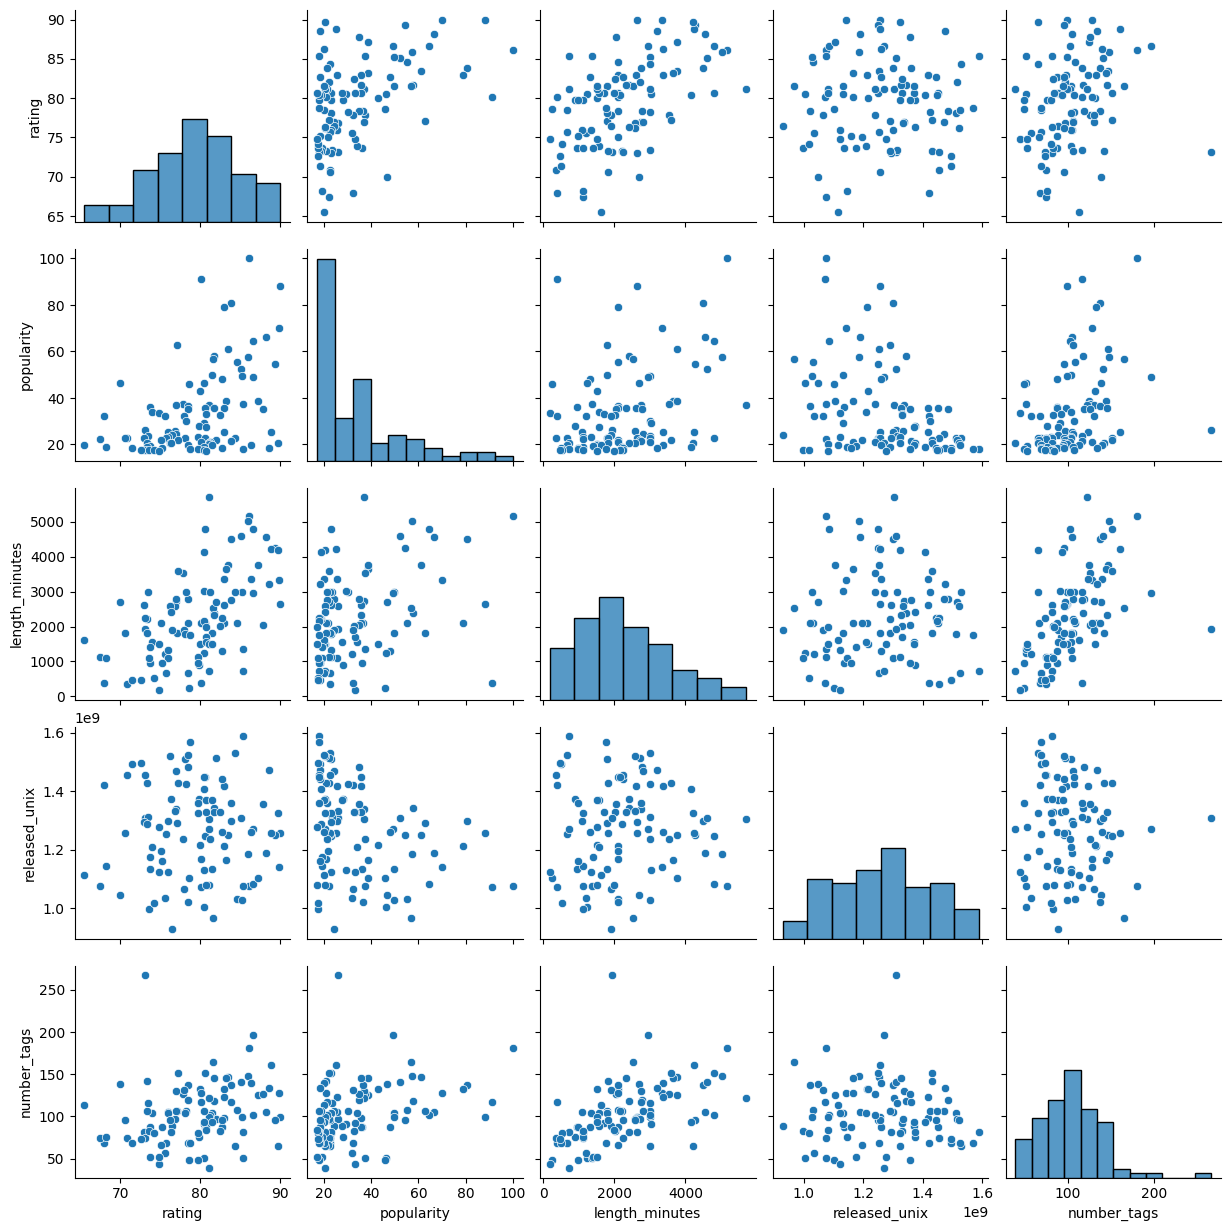

In [6]:
subdf = df[['rating', 'popularity', 'length_minutes', 'released_unix', 'number_tags']]

sns.pairplot(subdf)

Text(0.5, 0, 'Number of tags')

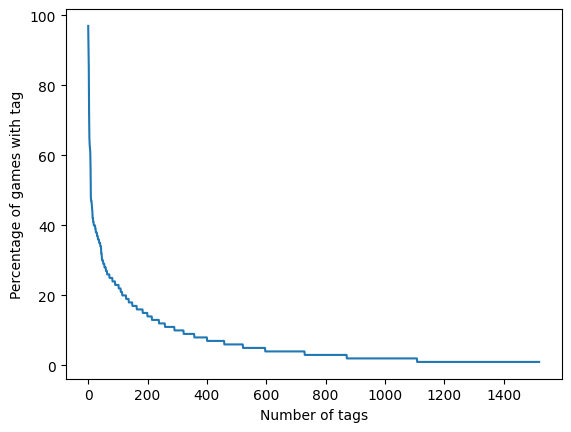

In [8]:
fraction_per_tag = df['tags'].explode().value_counts()

plt.plot(list(fraction_per_tag))
# plt.plot([0, 1450], [10, 10])
# plt.yscale('log')
# plt.xscale('log')
plt.ylabel('Percentage of games with tag')
plt.xlabel('Number of tags')

In [9]:
cutoff_tag = 200

tags_to_keep = fraction_per_tag[:200].index
tags_to_remove = fraction_per_tag[200:].index

In [11]:
for tag in tags_to_keep:
    df[tag] = df['tags'].apply(lambda l: tag in l)

df

,tags,length_minutes,title,popularity,id,rating,released,released_unix,number_tags,g133,...,g1642,g1555,g43,g2063,g65,g868,g3139,g1182,g3148,g334
0,"[g4, g9, g6, g19, g2, g32, g23, g250, g58, g13...",5160,Fate/stay night,100.00,v11,86.1,2004-01-30,1075420800,181,True,...,False,False,True,False,False,True,False,True,False,True
1,"[g23, g8, g19, g117, g156, g633, g420, g1897, ...",375,Saya no Uta,91.10,v97,80.1,2003-12-26,1072396800,117,True,...,False,False,True,True,False,False,False,False,False,False
2,"[g19, g32, g147, g188, g133, g3397, g783, g201...",2636,STEINS;GATE,88.11,v2002,90.0,2009-10-15,1255564800,99,True,...,False,False,False,False,False,True,False,False,False,False
3,"[g23, g32, g292, g79, g147, g139, g195, g756, ...",4500,Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-,80.66,v5154,83.8,2011-02-25,1298592000,137,True,...,False,True,False,False,False,False,False,False,False,False
4,"[g23, g19, g32, g48, g598, g1335, g698, g2390,...",2100,G-senjou no Maou,78.94,v211,82.9,2008-05-29,1212019200,133,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[g23, g3, g7, g2, g8, g6, g5, g4, g278, g210, ...",1101,Kagetsu Tooya,17.75,v47,73.6,2001-08-13,997660800,83,True,...,False,False,True,False,False,False,True,True,False,False
96,"[g23, g19, g3, g12, g25, g154, g219, g160, g82...",522,Kikokugai - The Cyber Slayer,17.68,v183,74.2,2002-03-29,1017360000,80,True,...,False,False,True,False,False,False,False,False,False,False
97,"[g23, g133, g737, g1190, g1260, g1633, g3610, ...",458,Neko Para Vol.3 Neko-tachi no Aromatize,17.45,v19385,72.6,2017-05-25,1495670400,73,True,...,False,False,False,True,False,False,False,False,False,False
98,"[g32, g4, g337, g147, g47, g779, g851, g1274, ...",1988,Symphonic Rain,17.30,v38,80.7,2004-03-26,1080259200,84,True,...,False,False,False,False,False,False,False,False,False,False


In [31]:
import umap

# running UMAP
# use the non-standardized data X[:, flux_idxs]
map_obj = umap.UMAP()
y_umap = map_obj.fit_transform(df.drop(['length_minutes', 'tags', 'title', 'popularity', 'id', 'rating', 'released', 'released_unix', 'number_tags'], axis=1))

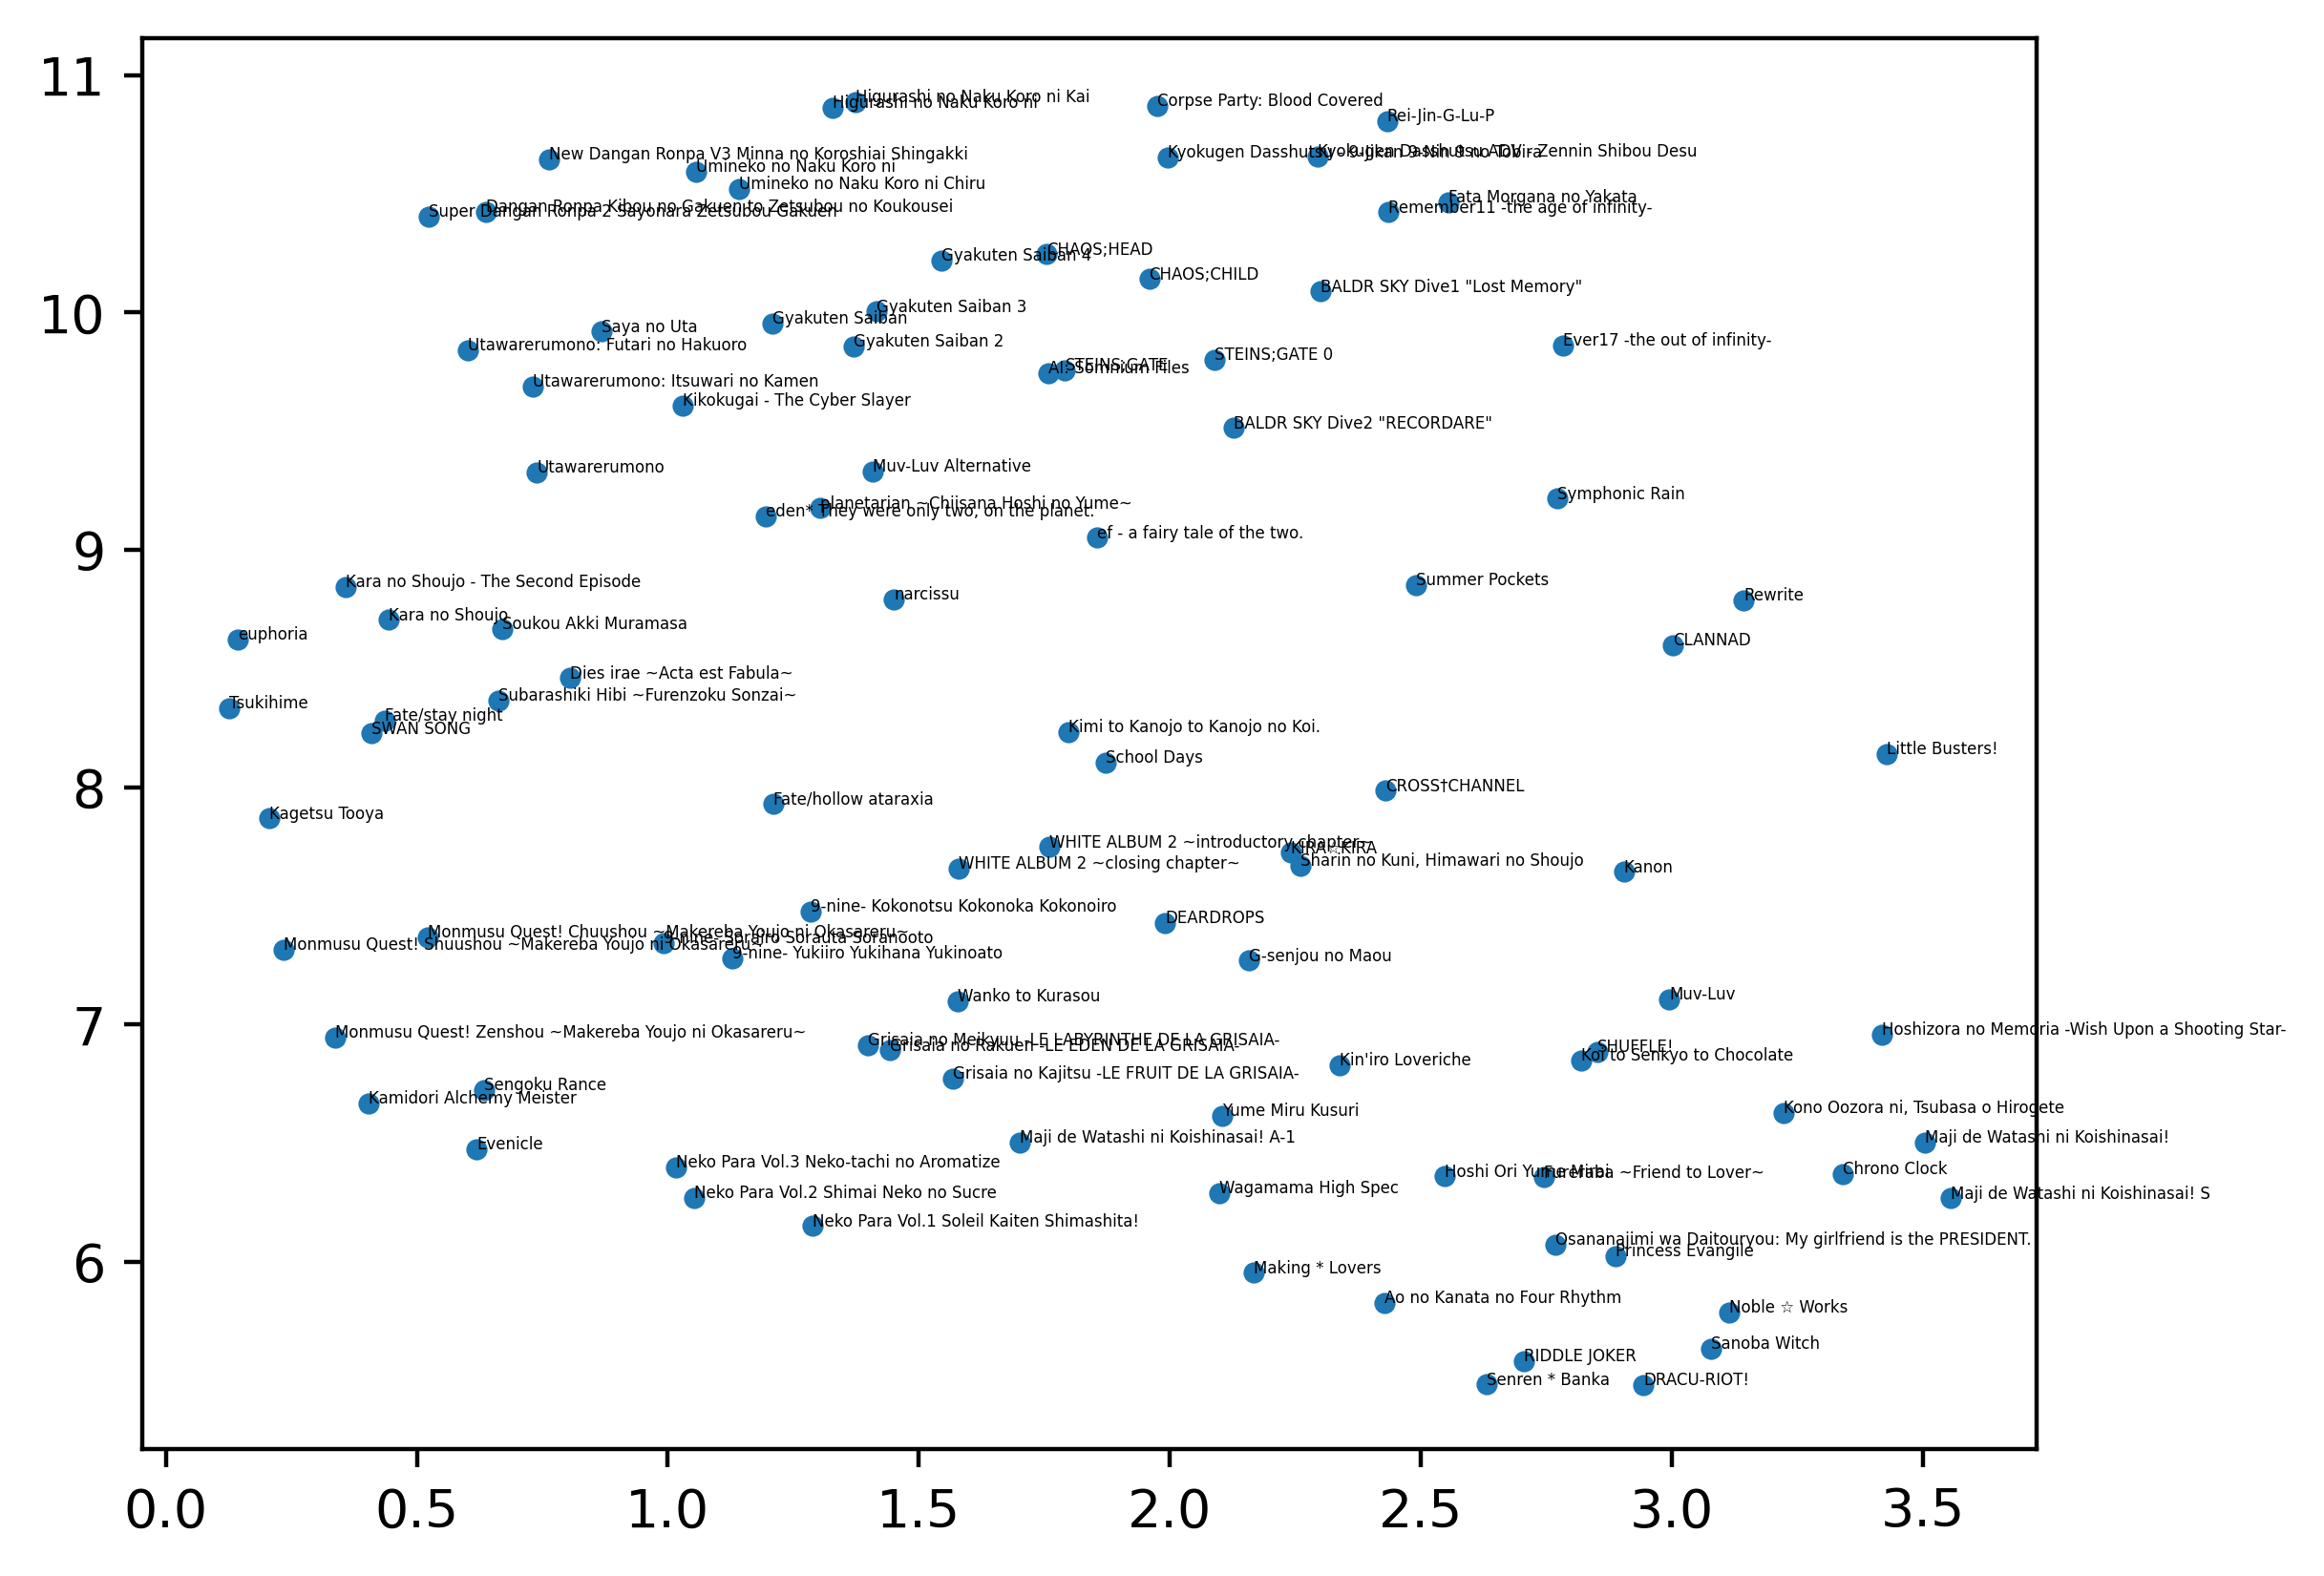

In [32]:
plt.rcParams['figure.dpi'] = 400

plt.plot(y_umap[:,0], y_umap[:, 1], '. ')

for i, txt in enumerate(df['title']):
    plt.annotate(txt, (y_umap[i, 0], y_umap[i, 1]), fontsize=3)

In [28]:
df.drop(['tags', 'title', 'popularity', 'id', 'rating', 'released', 'number_tags'], axis=1).columns

Index(['length_minutes', 'released_unix', 'g133', 'g32', 'g728', 'g633', 'g96',
       'g3171', 'g676', 'g148',
       ...
       'g1642', 'g1555', 'g43', 'g2063', 'g65', 'g868', 'g3139', 'g1182',
       'g3148', 'g334'],
      dtype='object', length=202)

In [29]:
from sklearn.manifold import TSNE

# running t-SNE
# use the non-standardized data X[:, flux_idxs]
tsne = TSNE()
y_tsne = tsne.fit_transform(df.drop(['length_minutes', 'tags', 'title', 'popularity', 'id', 'rating', 'released', 'released_unix', 'number_tags'], axis=1))

c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


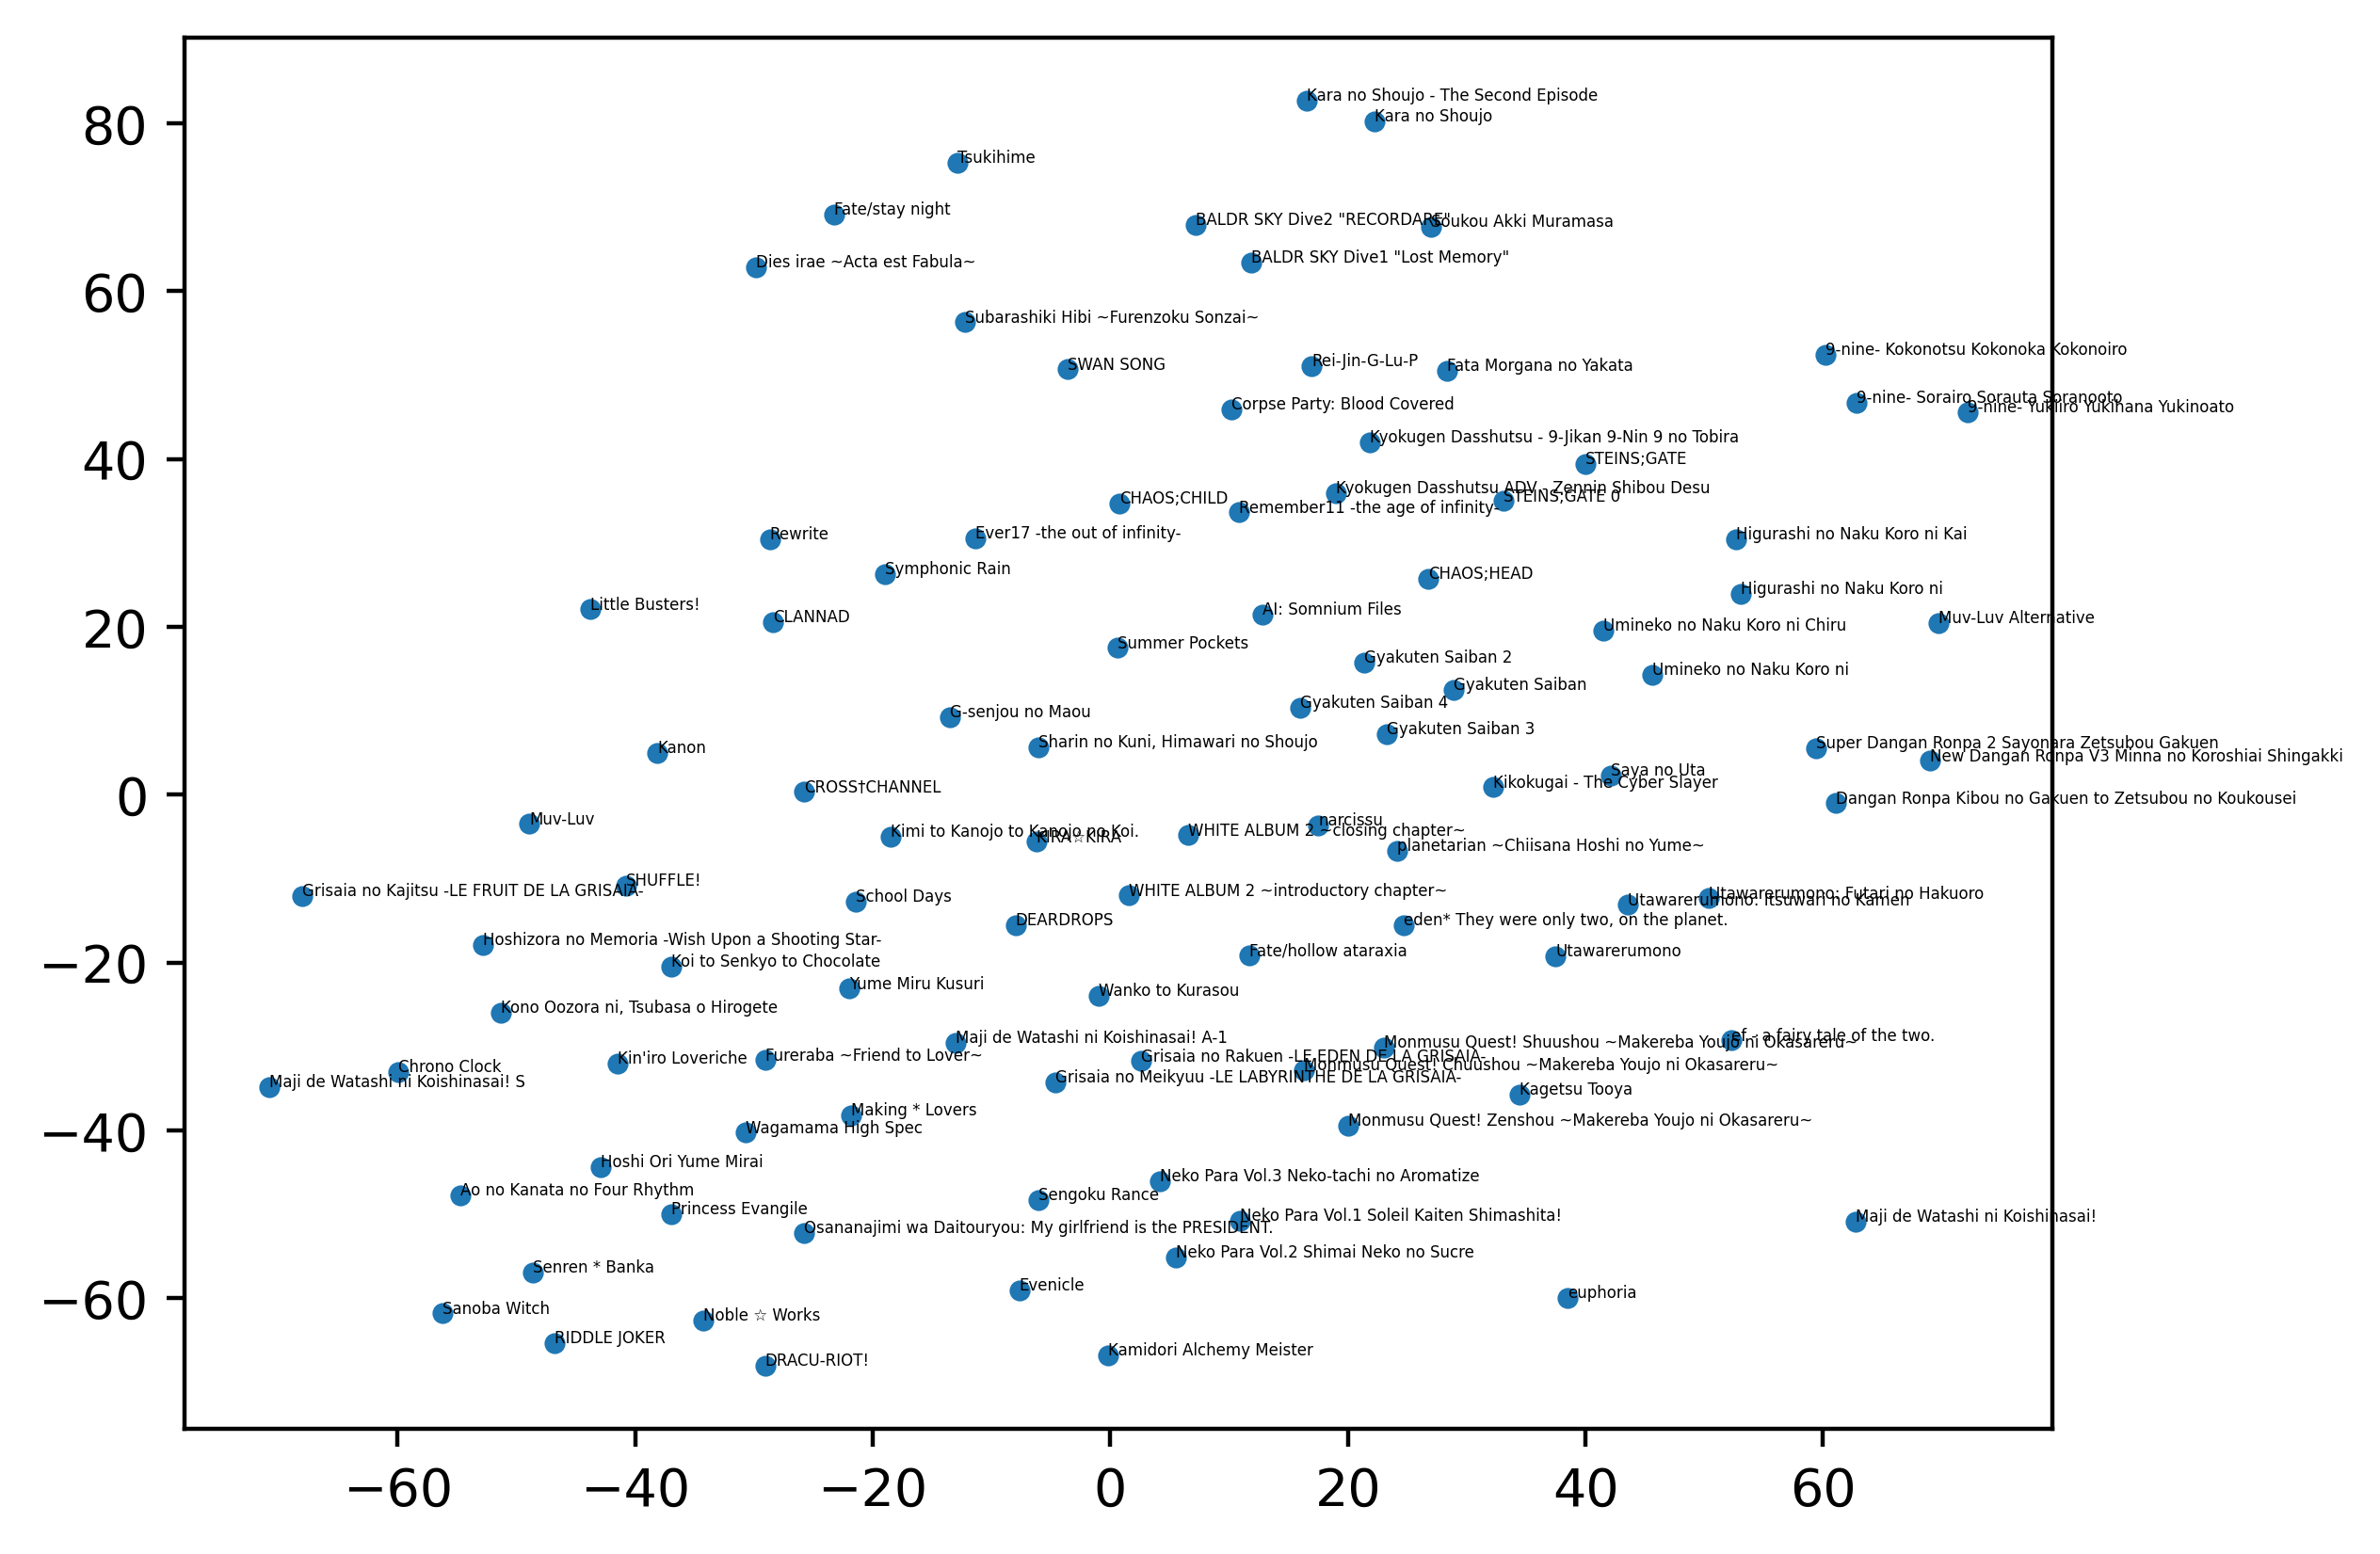

In [30]:
plt.rcParams['figure.dpi'] = 400

plt.plot(y_tsne[:,0], y_tsne[:, 1], '. ')

for i, txt in enumerate(df['title']):
    plt.annotate(txt, (y_tsne[i, 0], y_tsne[i, 1]), fontsize=3)